# Data Exploration

In this problem we have the task for predicting the miles per galoons(mpg) of the cars based on several
other car related features. In this section we will try to understand the data through basic data exploration. 

In [1]:
#importing library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Study of the target variable "mpg"

In [2]:
car_df=pd.read_csv("C:/Users/Mainak Kundu/Desktop/Samiran/Rakuten/data.csv")

In [3]:
#Understanding the nature of columns of data
car_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

So all of them are numerical some are multi-valued discerete and some are continious

In [4]:
#Let us try to consider the target variable and understand its distribution
print(car_df["mpg"].describe())

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64


From the intial statistical analysis we got that we dont have any
negetive values in the mpg column and the values are all lying between
9 to 46, which appears to be resonable.

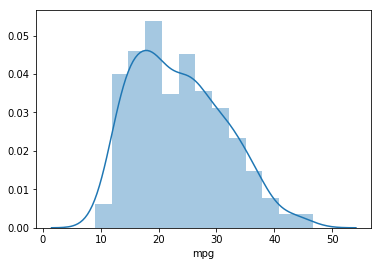

In [5]:
#distribution plot for the target variable
sns.distplot(car_df['mpg']);

From this we can understand the distribution is not exact normal
and is having a slight positive skewness. Let us try to understand
this more with skewness and kurtosis calculation to see how much it
is deviating from normality.  

In [6]:
#skewness and kurtosis
print("Skewness: {}".format(car_df["mpg"].skew()))
print("Kurtosis: {}".format(car_df["mpg"].kurt()))

Skewness: 0.45706634399491913
Kurtosis: -0.5107812652123154


So from this we can understand the target variable is slightly
positively skewed and is platikartic with respect to normal distribution.

# Understanding missing values for all the features in the dataset

In [7]:
#finding which columns have missing values
car_df.isnull().sum().sort_values(ascending=False)

horsepower      6
acceleration    4
car name        0
origin          0
model year      0
weight          0
displacement    0
cylinders       0
mpg             0
dtype: int64

So only horsepower and accelaration has missing values and has to be properly
taken care during modelling and exploration

# Understanding anolmalies of independent features in the data set

In [8]:
#let us first try to understand multivalued discrete variables first
discrete=["cylinders","model year","origin"]

#Plot for the set of values for each discrete variables
for i in discrete:
    print("The distribution of values for {} is".format(i))
    print(car_df.groupby(i).count()["mpg"].reset_index(name='count'))

The distribution of values for cylinders is
   cylinders  count
0          3      4
1          4    203
2          5      3
3          6     83
4          8    102
5         60      1
6         80      1
7        400      1
The distribution of values for model year is
    model year  count
0           70     29
1           71     28
2           72     28
3           73     40
4           74     27
5           75     30
6           76     34
7           77     28
8           78     36
9           79     29
10          80     29
11          81     28
12          82     30
13         181      1
14         182      1
The distribution of values for origin is
   origin  count
0       1    249
1       2     70
2       3     79


From this we understand that in cylinder the value of 60, 80 and 400 appears to be anomalies. Same way for model year
181 and 182 are outside the range of values for model and appears to be faulty. In origin all the values appears to be 
reasonable. We have to take some action for these anomalies for cylinders and model year when we will be doing modelling.

In [9]:
#Anomalies for continious variables
continious=["displacement","horsepower","weight","acceleration"]
for i in continious:
    print("\n")
    print("Minimum 5 values for {} are :".format(i))
    print(((car_df[i].dropna()-car_df[i].mean())/car_df[i].std()).sort_values()[-5:].values)
    print("Miximum 5 values for {} are :".format(i))
    print(((car_df.dropna()[i].dropna()-car_df[i].mean())/car_df[i].std()).sort_values()[:5].values)




Minimum 5 values for displacement are :
[2.36476938 2.4990364  2.5086269  2.5086269  2.5086269 ]
Miximum 5 values for displacement are :
[-1.20289704 -1.18371603 -1.18371603 -1.18371603 -1.17412553]


Minimum 5 values for horsepower are :
[3.0014843  3.13138426 3.13138426 3.13138426 3.26128421]
Miximum 5 values for horsepower are :
[-1.51903418 -1.51903418 -1.4670742  -1.4670742  -1.4670742 ]


Minimum 5 values for weight are :
[2.33877855 2.33995941 2.34350198 2.39309802 2.56196074]
Miximum 5 values for weight are :
[-1.60292591 -1.56041502 -1.43524406 -1.42933977 -1.41398861]


Minimum 5 values for acceleration are :
[2.39564571 2.8657617  2.93808723 3.26355215 3.33587768]
Miximum 5 values for acceleration are :
[-2.73946736 -2.55865352 -2.55865352 -2.37783968 -2.19702584]


# Scatter plot of all features to have a overall undersanding of all the features in the data

C:\Users\Mainak Kundu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Mainak Kundu\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Mainak Kundu\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


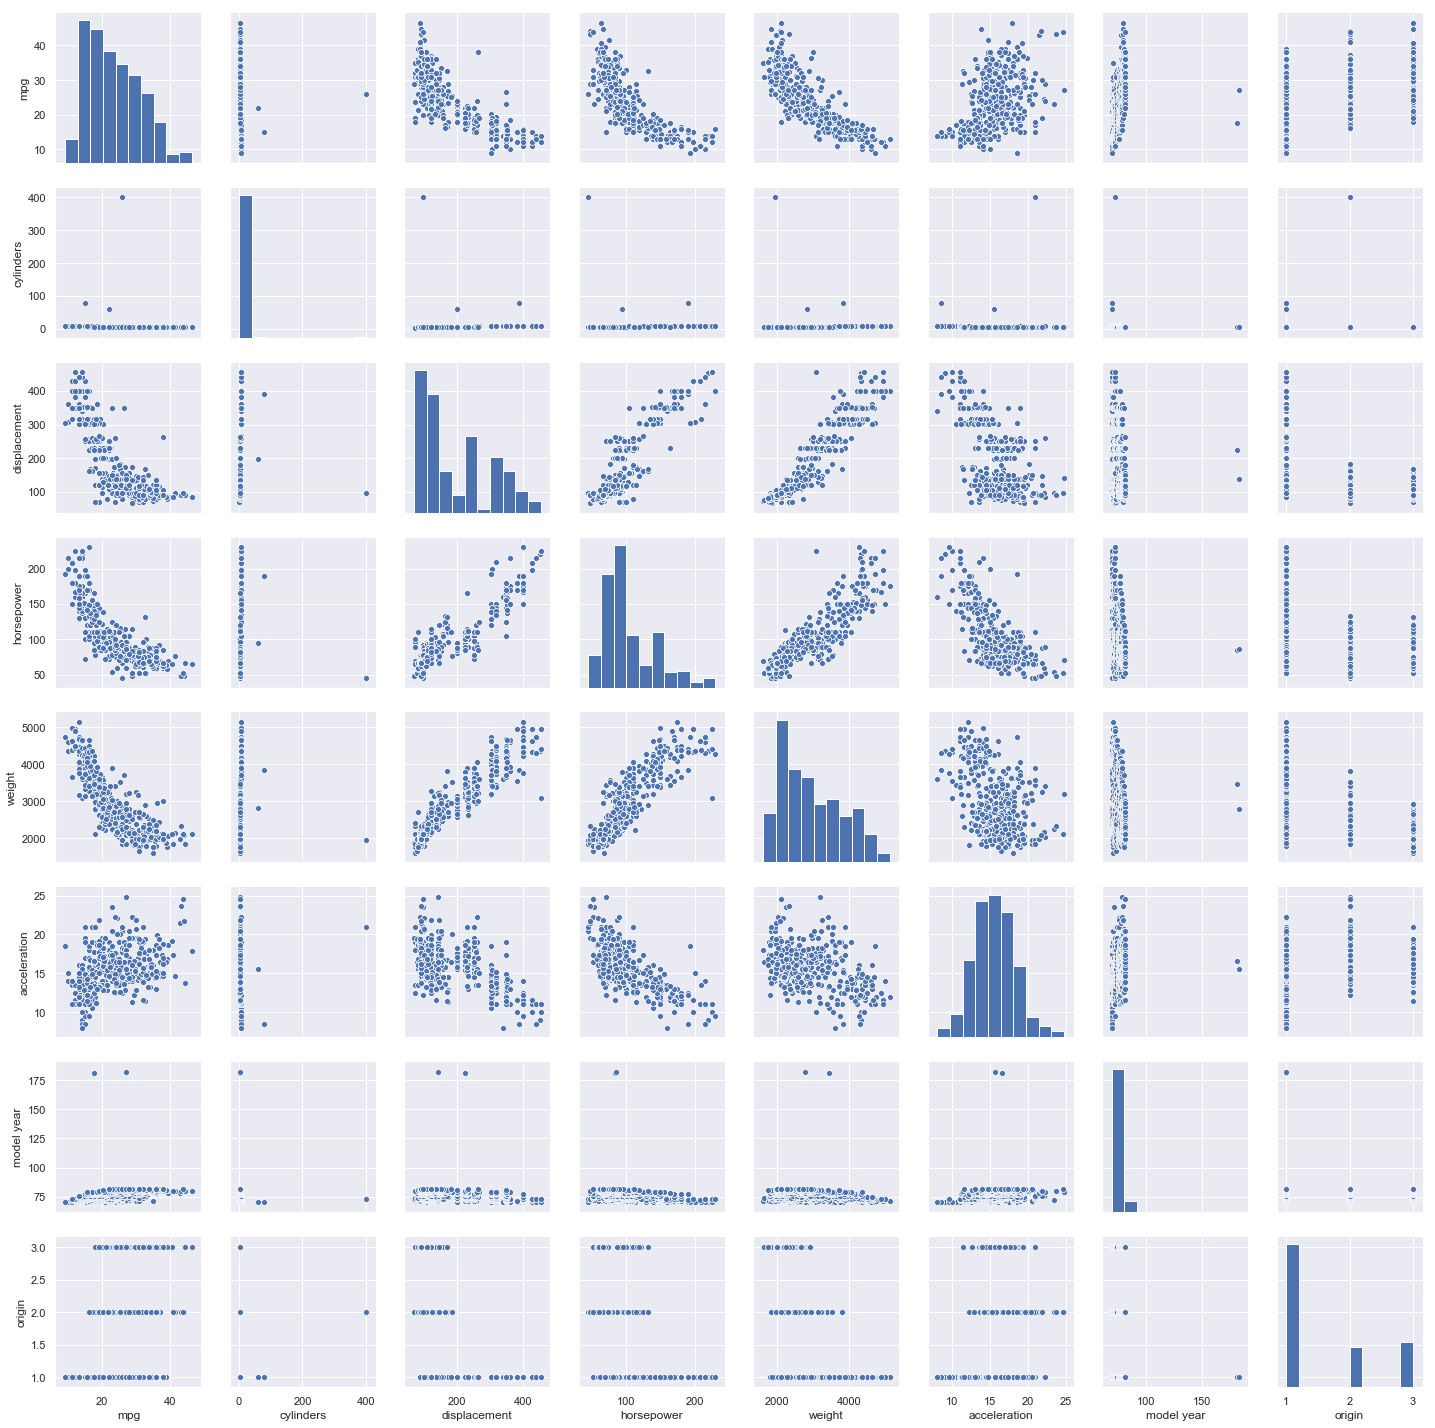

In [10]:
#scatterplot
sns.set()
features = list(car_df.columns)
sns.pairplot(car_df[features], size = 2.5)
plt.show();

Interesting observation from the pair-plot:
1. displacement, horsepower and weight are all inversely proportional to the target variable mpg
2. accelaration has slight positive correlation with the target variable mpg
3. horsepower, weight and displacement are all positive skewed
4. displacement, weight and horsepower seems to have high correlation between one another.

# Box Plot analysis for multivalued discrete variables

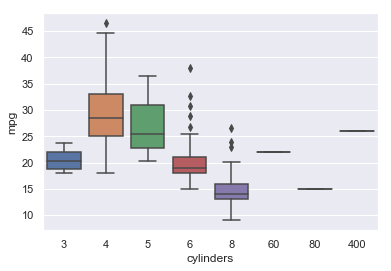

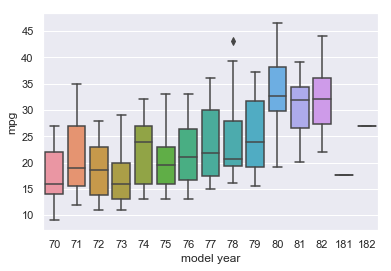

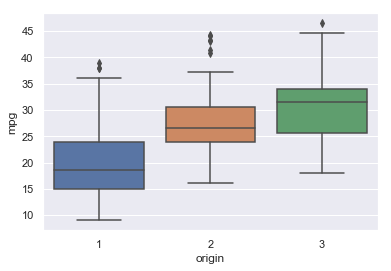

In [11]:
#box plot analysis for multivalued discrete variables
discrete=["cylinders","model year","origin"]
for i in discrete:
    var = i
    data = pd.concat([car_df["mpg"], car_df[var]], axis=1)
    f, ax = plt.subplots()
    fig = sns.boxplot(x=var, y="mpg", data=data)
    fig.axis()

Remarks:
1. There are some larger values of mpg present for cylinders=6. The box-plot for cylinders>8 are single
   line representing there are only one value for with that cylinder values.
2. The box-plot for model year 181 and 182 are also dashed single lines representing a single value for that 
   model year.
3. There is a increasing trend of mpg value with origin and model year. But there is a decreasing trend of 
   mpg with respect to cylinder.

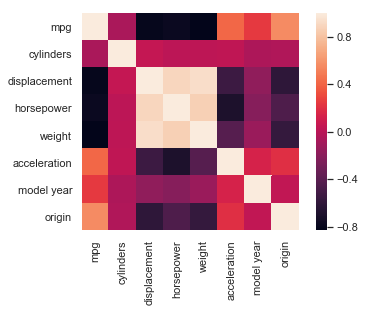

In [12]:
#correlation matrix
corrmat = car_df.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, square=True)

Statement 2 and 4  in the previous paragraph is proved to be true again using the correlation matrix heatmap plot 